# Loading Graphs in NetworkX

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
#%matplotlib notebook
import matplotlib.pyplot as plt

G1 = nx.Graph()
G1.add_edges_from([(0, 1),
                   (0, 2),
                   (0, 3),
                   (0, 5),
                   (1, 3),
                   (1, 6),
                   (3, 4),
                   (4, 5),
                   (4, 7),
                   (5, 8),
                   (8, 9)])

nx.draw_networkx(G1)

In [2]:
import networkx as nx
 
G=nx.MultiGraph()
G.add_node('A',role='manager')
G.add_edge('A','B',relation = 'friend')
G.add_edge('A','C', relation = 'business partner')
G.add_edge('A','B', relation = 'classmate')
G.nodes['A']['role'] = 'team member'
G.nodes['B']['role'] = 'engineer'

G.nodes(data='role')
G.edges(data='relation')

MultiEdgeDataView([('A', 'B', 'friend'), ('A', 'B', 'classmate'), ('A', 'C', 'business partner')])

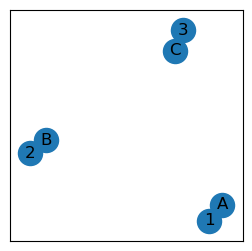

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3,3))

t=nx.MultiGraph()

t.add_nodes_from(['A','B','C'])
t.add_nodes_from([1, 2, 3])
t.add_edges_from([('A',1),('B',2),('C',3)])

nx.draw_networkx(t)

In [4]:
nx.bipartite.is_bipartite(G1)

False

### Adjacency List

In [5]:
!cat G_adjlist.txt

0 1 2 3 5
1 3 6
2
3 4
4 5 7
5 8
6
7
8 9
9


In [6]:
G2 = nx.read_adjlist('G_adjlist.txt', nodetype=int)
G2.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (5, 4), (5, 8), (4, 7), (8, 9)])

### Adjacency Matrix

In [7]:
G_mat = np.array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
                  [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
                  [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])
G_mat

array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [8]:
G3 = nx.Graph(G_mat)
G3.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (4, 5), (4, 7), (5, 8), (8, 9)])

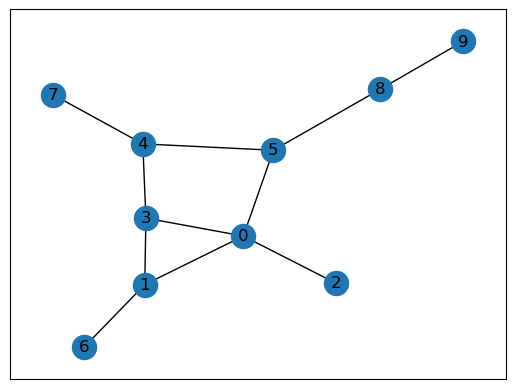

In [9]:
nx.draw_networkx(G3)

### Edgelist

In [10]:
!cat G_edgelist.txt

0 1 4
0 2 3
0 3 2
0 5 6
1 3 2
1 6 5
3 4 3
4 5 1
4 7 2
5 8 6
8 9 1


In [11]:
G4 = nx.read_edgelist('G_edgelist.txt', data=[('Weight', int)])

G4.edges(data=True)

EdgeDataView([('0', '1', {'Weight': 4}), ('0', '2', {'Weight': 3}), ('0', '3', {'Weight': 2}), ('0', '5', {'Weight': 6}), ('1', '3', {'Weight': 2}), ('1', '6', {'Weight': 5}), ('3', '4', {'Weight': 3}), ('5', '4', {'Weight': 1}), ('5', '8', {'Weight': 6}), ('4', '7', {'Weight': 2}), ('8', '9', {'Weight': 1})])

### Pandas DataFrame

In [12]:
G_df = pd.read_csv('G_edgelist.txt', delimiter='\s', 
                   header=None, names=['n1', 'n2', 'weight'])
G_df

n1  n2  weight
0    0   1       4
1    0   2       3
2    0   3       2
3    0   5       6
4    1   3       2
5    1   6       5
6    3   4       3
7    4   5       1
8    4   7       2
9    5   8       6
10   8   9       1

In [13]:
G5 = nx.from_pandas_edgelist(G_df, 'n1', 'n2', edge_attr='weight')
G5.edges(data=True)

EdgeDataView([(0, 1, {'weight': 4}), (0, 2, {'weight': 3}), (0, 3, {'weight': 2}), (0, 5, {'weight': 6}), (1, 3, {'weight': 2}), (1, 6, {'weight': 5}), (3, 4, {'weight': 3}), (5, 4, {'weight': 1}), (5, 8, {'weight': 6}), (4, 7, {'weight': 2}), (8, 9, {'weight': 1})])

### Chess Example

In [14]:
!head -5 chess_graph.txt

1 2 0	885635999.999997
1 3 0	885635999.999997
1 4 0	885635999.999997
1 5 1	885635999.999997
1 6 0	885635999.999997


In [15]:
chess = nx.read_edgelist('chess_graph.txt', data=[('outcome', int), ('timestamp', float)], 
                         create_using=nx.MultiDiGraph())

In [16]:
chess.is_directed(), chess.is_multigraph()

(True, True)

In [17]:
list(chess.edges(data=True))[0:10]

[('1', '2', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '3', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '4', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '5', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('1', '6', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '807', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('1', '454', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('1', '827', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('1', '1240', {'outcome': 0, 'timestamp': 906660000.0}),
 ('1', '680', {'outcome': 0, 'timestamp': 906660000.0})]

In [18]:
games_played = chess.degree()
list(games_played)[0:10]

[('1', 48),
 ('2', 112),
 ('3', 85),
 ('4', 12),
 ('5', 18),
 ('6', 95),
 ('7', 9),
 ('8', 20),
 ('9', 142),
 ('10', 4)]

In [19]:
max_value = max(dict(games_played).values())
max_key = [i for i in dict(games_played).keys() if games_played[i] == max_value]

print('player {}\n{} games'.format(max_key[0], max_value))

player 461
280 games


In [20]:
df = pd.DataFrame(chess.edges(data=True), columns=['white', 'black', 'outcome'])
df.head()

white black                                        outcome
0     1     2  {'outcome': 0, 'timestamp': 885635999.999997}
1     1     3  {'outcome': 0, 'timestamp': 885635999.999997}
2     1     4  {'outcome': 0, 'timestamp': 885635999.999997}
3     1     5  {'outcome': 1, 'timestamp': 885635999.999997}
4     1     6  {'outcome': 0, 'timestamp': 885635999.999997}

In [21]:
df['outcome'] = df['outcome'].apply(lambda x: x['outcome'])
df.head()

white black  outcome
0     1     2        0
1     1     3        0
2     1     4        0
3     1     5        1
4     1     6        0

In [22]:
won_as_white = df[df['outcome']==1].groupby('white').sum()
won_as_black = -df[df['outcome']==-1].groupby('black').sum()
win_count = won_as_white.add(won_as_black, fill_value=0)
win_count.head(6)

outcome
1         7.0
100       7.0
1000      1.0
1002      1.0
1003      5.0
1005     13.0

In [23]:
won_as_white.join(won_as_black, how='inner', lsuffix='_white', rsuffix='_black').join(win_count, how='inner', rsuffix='total_').head()

outcome_white  outcome_black  outcome
1                 4              3      7.0
100               4              3      7.0
1003              4              1      5.0
1005              5              8     13.0
1007             28             17     45.0

In [24]:
pd.DataFrame([won_as_white['outcome'], won_as_black['outcome'], win_count['outcome']]).T.fillna(value=0).head()

outcome  outcome  outcome
1         4.0      3.0      7.0
100       4.0      3.0      7.0
1002      1.0      0.0      1.0
1003      4.0      1.0      5.0
1005      5.0      8.0     13.0

In [25]:
won_as_white.head()

outcome
white         
1            4
100          4
1002         1
1003         4
1005         5

In [26]:
won_as_black.head()

outcome
black         
1            3
100          3
1000         1
1003         1
1005         8

In [27]:
win_count.nlargest(5, 'outcome')

outcome
330    109.0
467    103.0
98      94.0
456     88.0
461     88.0